### Train - test split

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data1 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_MALE.csv')
data2 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([data1[0:500],data2[0:500]],ignore_index=True)
ansur_df = ansur_df.drop(columns =['Branch', 'Component','weight_kg', 'stature_m', 'BMI', 'BMI_class', 'Height_class'])

In [9]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

300 rows in test set vs. 700 in training set. 91 Features.


### Fitting and testing the model

In [11]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

93.3% accuracy on test set vs. 94.7% on training set


### Accuracy after dimensionality reduction

In [12]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.3% accuracy on test set vs. 93.9% on training set


### Finding a good variance threshold


In [11]:
data1 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_MALE.csv')
data2 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([data1,data2],ignore_index=True)
head_df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]

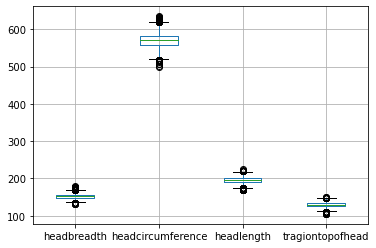

In [13]:
# Create the boxplot
head_df.boxplot()

plt.show()

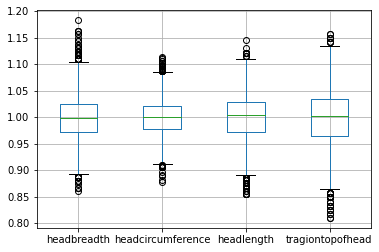

In [14]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [15]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
dtype: float64


### Features with low variance

In [17]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.0015)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 4 to 3.


### Removing features with many missing values


In [23]:
school_df = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/Public_Schools2.csv')
school_df.isna().sum()/len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [25]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


In [41]:
data1 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_MALE.csv')
data2 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([data1,data2],ignore_index=True)
ansur_df = ansur_df[['elbowrestheight','waistcircumference','anklecircumference','buttockheight','crotchheight']]

In [42]:
ansur_df.corr()

,elbowrestheight,waistcircumference,anklecircumference,buttockheight,crotchheight
elbowrestheight,1.000000,0.324598,0.301963,-0.007013,-0.026090
waistcircumference,0.324598,1.000000,0.569306,0.282962,0.236568
anklecircumference,0.301963,0.569306,1.000000,0.367548,0.386502
buttockheight,-0.007013,0.282962,0.367548,1.000000,0.929411
crotchheight,-0.026090,0.236568,0.386502,0.929411,1.000000


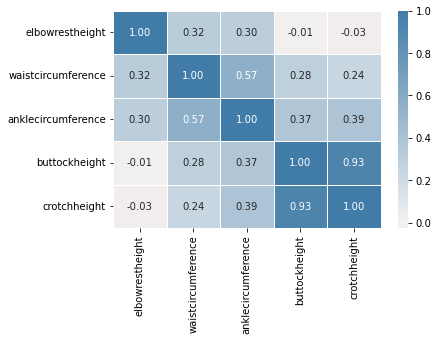

In [44]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240,as_cmap=True)

# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


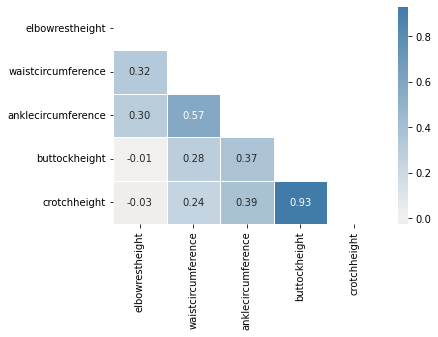

In [46]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

### Filtering out highly correlated features


In [47]:
ansur_df = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_MALE.csv')

In [48]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 88 columns.


### Nuclear energy and pool drownings


In [49]:
weird_dict = {'nuclear_energy': {0: 728.3,
  1: 753.9,
  2: 768.8,
  3: 780.1,
  4: 763.7,
  5: 788.5,
  6: 782.0,
  7: 787.2,
  8: 806.4,
  9: 806.2,
  10: 798.9},
 'pool_drownings': {0: 421,
  1: 465,
  2: 494,
  3: 538,
  4: 430,
  5: 530,
  6: 511,
  7: 600,
  8: 582,
  9: 605,
  10: 603}}

weird_df = pd.DataFrame(weird_dict)

In [50]:
# Print the first five lines of weird_df
print(weird_df.head(5))

   nuclear_energy  pool_drownings
0           728.3             421
1           753.9             465
2           768.8             494
3           780.1             538
4           763.7             430


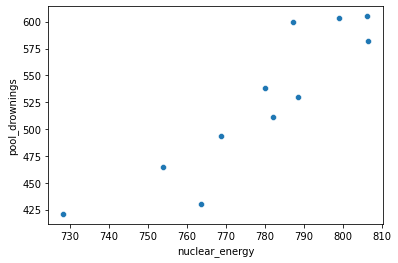

In [51]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

In [52]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())

                nuclear_energy  pool_drownings
nuclear_energy        1.000000        0.901179
pool_drownings        0.901179        1.000000
